# 02. Neural Network classification with PyTorch

Classification is a problem of predicting weather something is one thing or another (there can be multiple things as the options).

Book version of the notebook—https://www.learnpytorch.io/02_pytorch_classification/

## 1. Make a classification data and get it ready

In [1]:
import sklearn
from matplotlib import pyplot as plt

In [2]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples=n_samples, noise=0.03, random_state=42)
len(X), len(y)

(1000, 1000)

In [3]:
print(f"First 5 samples of X:\n {X[:5]}")
print(f"First 5 samples of y:\n {y[:5]}")

First 5 samples of X:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y:
 [1 1 1 1 0]


In [4]:
# Make DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({'X1': X[:, 0], 'X2': X[:, 1], 'y': y})
circles.head()

,X1,X2,y
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


/var/folders/23/d0f0651j24d9y8lqrqd6k1dw0000gn/T/ipykernel_27403/1654379297.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  circles.plot(kind='scatter', x='X1', y='X2', c='y', cmap=plt.cm.get_cmap("winter"));


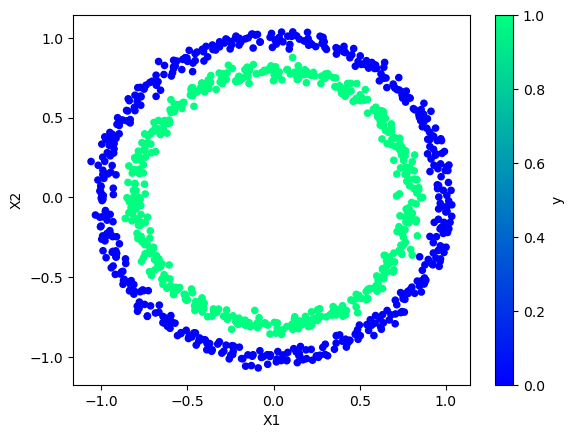

In [5]:
import matplotlib.pyplot as plt
circles.plot(kind='scatter', x='X1', y='X2', c='y', cmap=plt.cm.get_cmap("winter"));

**Note:** The data we're working with is often referred to as a toy dataset, a dataset that is small enough to experiment but still sizable enough to practice the fundamentals.

### 1.1 Check input and output shapes

In [6]:
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]], shape=(1000, 2))

In [8]:
X_sample = X[0]
y_sample = y[0]

print (f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print (f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


In [9]:
import torch
torch.__version__

'2.7.1'

In [10]:
# Turn data into tensors
X = torch.Tensor(X).float()
y = torch.Tensor(y).float()

In [11]:
X.dtype, y.dtype

(torch.float32, torch.float32)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
len(X_train), len(y_train), len(X_test), len(y_test)

(800, 800, 200, 200)

In [14]:
n_samples

1000

## 2. Building a model

Let's build a model to classify our blue and red dots.

Ro do so, we want to:
1. Setup device-agnostic code so our code will run on an accelerator (GPU) if there is one
2. Construct a model (by subclassing `nn.Module`
3. Define a loss function and optimizer
4. Create a training and test loop

In [15]:
# Import PyTorch and nn
import torch
from torch import nn

# Make device-agnostic code
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [16]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

Now we've set up device-agnostic code, let's create a model that:

1. Subclasses `nn.Module` (almost all models in PyTorch subclass `nn.Module`)
2. Create 2 `nn.Linear()` layers that are capable of handling the shapes of our data
3. Defines a `forward()` method that outlines the forward pass (or forward computation) of the model
4. Instantiate an instance of our model class and send it to the target `device`

In [17]:
X_train.shape

torch.Size([800, 2])

In [18]:
# 1. Construct a model that subclasses nn.Module
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        # 2. Create 2 nn.Linear Layers capable of handling the shape of our data
        self.layer_1 = nn.Linear(in_features=2, out_features=5, bias=True) # takes in 2 features and upscales to 5 features
        self.layer_2 = nn.Linear(in_features=5, out_features=1, bias=True) # takes in 5 features from the previous layer and outputs a single feature (same as y)
        self.two_linear_layers = nn.Sequential(
            nn.Linear(in_features=2, out_features=5),
            nn.Linear(in_features=5, out_features=1)
        )

    # 3. Define a forward() method that outlines the forward pass
    def forward(self, x):
        return self.two_linear_layers(x)

# 4. Instantiate an instance of our model class and send it to the target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
  (two_linear_layers): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): Linear(in_features=5, out_features=1, bias=True)
  )
)

In [19]:
device

device(type='cpu')

In [20]:
next(model_0.parameters()).device

device(type='cpu')

In [21]:
# Let's replicate the model above using nn.Sequential
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1),
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [22]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.1935,  0.4221],
                      [ 0.3651, -0.6557],
                      [-0.3585, -0.0843],
                      [-0.6292, -0.6322],
                      [-0.2360,  0.2411]])),
             ('0.bias', tensor([ 0.6873,  0.4361,  0.3408,  0.0805, -0.0860])),
             ('1.weight',
              tensor([[ 0.0085, -0.0843, -0.0997,  0.2693,  0.4358]])),
             ('1.bias', tensor([0.2749]))])

In [23]:
# Make predictions
with torch.inference_mode():
    untrained_preds = model_0(X_test.to(device))
print(f'Length of untrained predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}')
print(f'Length of test samples: {len(X_test)}, Shape: {X_test.shape}')
print(f'\nFirst 5 samples of untrained predictions:\n {torch.round(untrained_preds[:10])}')
print(f'\nFirst 5 samples of labels:\n {y_test[:10]}')

Length of untrained predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200, 2])

First 5 samples of untrained predictions:
 tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [-0.],
        [-0.],
        [0.],
        [0.]])

First 5 samples of labels:
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [24]:
X_test[:5], y_test[:5]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438]]),
 tensor([1., 0., 1., 0., 1.]))

### 2.1 Setup loss function and optimizer

WHich loss function or optimizer should you use?

Again... This is problem-specific.

For example, for regression, you might want MAE or MSE (mean absolute error or mean squared error).

For classification, you might want binary cross entropy or categorical cross-entropy (cross entropy)

As a reminder, the loss function measures how *wrong* your models predictions are.

And for optimizers, two of the most common and useful are SGD and Adam, however, PyTorch has many built-in options.

* For some common choices of loss functions and optimizers - https://www.learnpytorch.io/02 pytorch classification/#21-setup-loss-function-and-optimizer
* For the loss function, we're going to use `torch.nn.BECWithLogitsloss()`, for more on what binary cross entropy (BCE) is, check out this article—https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a
* For a definition on what a logit is in deep learning - https://stackoverflow.com/a/52111173/7900723
* For different optimizers see `torch.optim`

In [25]:
# Set up the loss function
# loss_fn = nn.BCELoss() # BCELoss = requires inputs to have gone through the sigmoid activation function prior to input to BCELoss
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid activation function built-in

optimizer = torch.optim.SGD(model_0.parameters(), lr=0.001)

In [26]:
# Calculate accuracy - out of 100 examples, what percentage does our model get right
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100
    return acc

## 3. Train model

To train our model, we're going to need to build a training loop with the following steps:

1. Forward pass
2. Calculate the loss
3. Optimizer zero grad
4. Loss backward (backpropagation)
5. Optimizer (gradient descent)

### 3.1 Going from raw logits -> prediciton pobabilities -> prediction labels

Our model outputs are going to be raw **logits**.

We can convert these **logits** into **prediction probabilities** by passing them to some kind of activation function (e.g., sigmoid for binary classification and softmax for multiclass classification).

Then we can convert our model's prediction probabilities to **prediction labels** by either rounding them or taking the `argmax()`.

In [27]:
# View the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
    y_logits = model_0(X_test.to(device))

y_logits[:5]

tensor([[0.2966],
        [0.1921],
        [0.3825],
        [0.2730],
        [0.0844]])

In [28]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [29]:
# Use the sigmoid activation function on our model logits to turn them into prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs[:5]

tensor([[0.5736],
        [0.5479],
        [0.5945],
        [0.5678],
        [0.5211]])

For our prediction probability values, we need to perform a range-style rounding on them:
* `y_pred_probs` >= 0.5, `y=1` (class 1)
* `y_pred_probs` < 0.5 `y=0` (class 0)

In [30]:
# find the predicted labels
y_preds = torch.round(y_pred_probs)

# In full
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimention
y_pred_labels.squeeze()

tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, Tr

tensor([1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1.,
        1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
        0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1.,
        1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0.,
        1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1.,
        1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
        1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0.,
        1., 1.], grad_fn=<SqueezeBackward0>)

### 3.2 Building a training and testing loop

In [31]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
EPOCHS = 1_000

# Put the data to a target device
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(EPOCHS):
    ### Training
    model_0.train()

    # 1. Forward pass
    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    # 2. Calculate the loss/accuracy
    loss = loss_fn(y_logits,
                   y_train)
    acc = accuracy_fn(y_train, y_pred)


    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward (backpropagation)
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    if epoch % 5 == 0:
        model_0.eval()
        with torch.inference_mode():
            # 1. Forward pass
            test_logits = model_0(X_test).squeeze()
            test_pred = torch.round(torch.sigmoid(test_logits))

            # 2. Test loss/acc
            loss = loss_fn(test_logits, y_test)
            acc = accuracy_fn(y_test, test_pred)

            print(f"Epoch: {epoch}, Loss: {loss}, Accuracy: {acc}")


Epoch: 0, Loss: 0.6985803842544556, Accuracy: 56.00000000000001
Epoch: 5, Loss: 0.6985542178153992, Accuracy: 56.00000000000001
Epoch: 10, Loss: 0.6985282301902771, Accuracy: 56.00000000000001
Epoch: 15, Loss: 0.6985023617744446, Accuracy: 56.00000000000001
Epoch: 20, Loss: 0.6984765529632568, Accuracy: 56.00000000000001
Epoch: 25, Loss: 0.6984509229660034, Accuracy: 56.00000000000001
Epoch: 30, Loss: 0.6984254717826843, Accuracy: 56.00000000000001
Epoch: 35, Loss: 0.6984000205993652, Accuracy: 56.00000000000001
Epoch: 40, Loss: 0.69837486743927, Accuracy: 56.00000000000001
Epoch: 45, Loss: 0.6983497738838196, Accuracy: 56.00000000000001
Epoch: 50, Loss: 0.6983247399330139, Accuracy: 56.00000000000001
Epoch: 55, Loss: 0.6982998847961426, Accuracy: 56.00000000000001
Epoch: 60, Loss: 0.6982751488685608, Accuracy: 55.50000000000001
Epoch: 65, Loss: 0.698250412940979, Accuracy: 55.50000000000001
Epoch: 70, Loss: 0.6982260346412659, Accuracy: 55.50000000000001
Epoch: 75, Loss: 0.69820165634

## 4. Make predictions and evaluate the model

From the metrics it looks like our model isn't learning anything...

So to inspect it let's make some predictions and make them visual!

In other words, "Visualize, visualize, visualize!"

To do so, we're going to import a function called `plot_decision_boundary()`

In [32]:
import requests
from pathlib import Path
# Download helper functions from Learn PyTorch repo (if it's not already downloaded)
if Path("helper_functions.py").is_file():
    print("helper_functions py already exists, skipping download")
else:
    print("Download helper functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)
from helper_functions import plot_predictions, plot_decision_boundary

helper_functions py already exists, skipping download


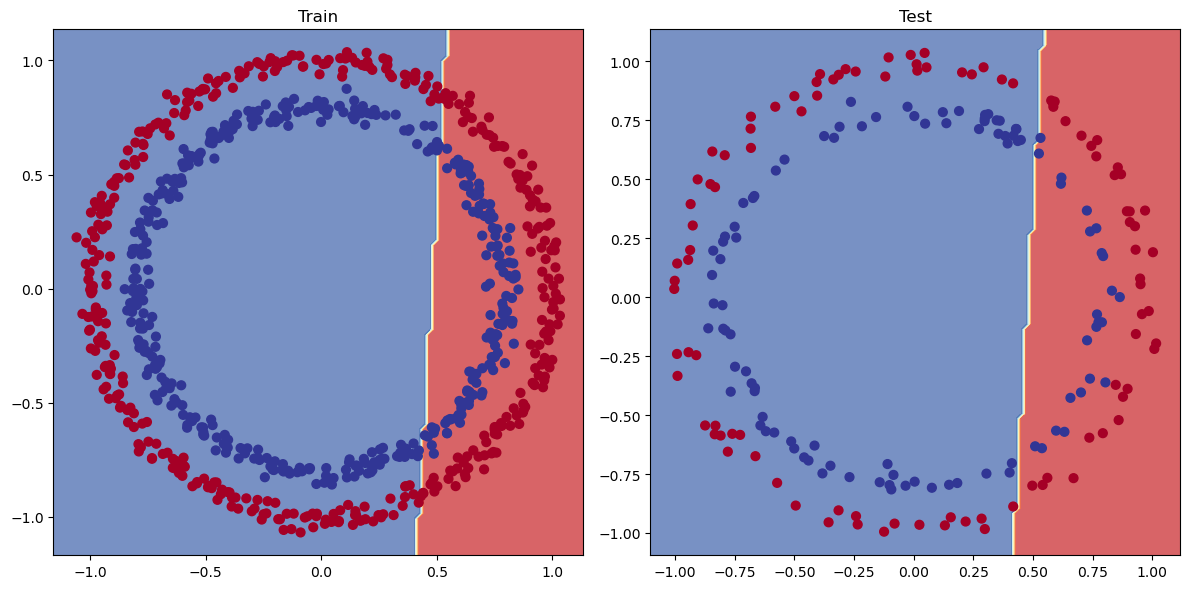

In [33]:
# Plot decision boundry of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)
plt.tight_layout()
plt.show()

## 5. Improving a model (from a model perspective)
* Add more layers - give the model more chances to learn about patterns in the data
* Add more hidden units - go from 5 hidden units to 10 hidden units
* Fit for longer
* Changing the activation functions
* Change the learning rate
* Change the loss function
These options are all from a model's perspective because they deal directly with the model, rather than the data.
And because these options are all values we (as machine learning engineers and data scientists) can change, they are referred to as **hyperparameters**.

In [34]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=8, bias=True)
        self.layer_2 = nn.Linear(in_features=8, out_features=4, bias=True)
        self.layer_3 = nn.Linear(in_features=4, out_features=1, bias=True)

    def forward(self, x):
        x = x ** 2  # Element-wise square
        x = torch.relu(self.layer_1(x))
        x = torch.relu(self.layer_2(x))
        return torch.relu(self.layer_3(x))

my_model = CircleModelV1().to(device)
my_model

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=8, bias=True)
  (layer_2): Linear(in_features=8, out_features=4, bias=True)
  (layer_3): Linear(in_features=4, out_features=1, bias=True)
)

In [35]:
# Create a loss function
loss_fn = nn.BCEWithLogitsLoss()

# Create an optimizer
optimizer = torch.optim.Adam(my_model.parameters(), lr=0.01)

In [36]:
# Write a training and evaluation loop for my_model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
EPOCHS = 1_000

# Put the data to a target device
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(EPOCHS):
    ### Training
    my_model.train()

    # 1. Forward pass
    y_logits = my_model(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    # 2. Calculate the loss/accuracy
    loss = loss_fn(y_logits,
                   y_train)
    acc = accuracy_fn(y_train, y_pred)


    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward (backpropagation)
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    if epoch % 5 == 0:
        my_model.eval()
        with torch.inference_mode():
            # 1. Forward pass
            test_logits = my_model(X_test).squeeze()
            test_pred = torch.round(torch.sigmoid(test_logits))

            # 2. Test loss/acc
            loss = loss_fn(test_logits, y_test)
            acc = accuracy_fn(y_test, test_pred)

            print(f"Epoch: {epoch}, Loss: {loss}, Accuracy: {acc}")

Epoch: 0, Loss: 0.6828553080558777, Accuracy: 50.0
Epoch: 5, Loss: 0.6812310814857483, Accuracy: 50.0
Epoch: 10, Loss: 0.6759439706802368, Accuracy: 56.99999999999999
Epoch: 15, Loss: 0.6697452664375305, Accuracy: 55.00000000000001
Epoch: 20, Loss: 0.6611379384994507, Accuracy: 57.49999999999999
Epoch: 25, Loss: 0.6500380635261536, Accuracy: 56.00000000000001
Epoch: 30, Loss: 0.634489893913269, Accuracy: 59.5
Epoch: 35, Loss: 0.6145402789115906, Accuracy: 62.0
Epoch: 40, Loss: 0.5898296236991882, Accuracy: 70.0
Epoch: 45, Loss: 0.5626912713050842, Accuracy: 72.0
Epoch: 50, Loss: 0.5336180329322815, Accuracy: 76.0
Epoch: 55, Loss: 0.5039450526237488, Accuracy: 78.5
Epoch: 60, Loss: 0.47648322582244873, Accuracy: 83.5
Epoch: 65, Loss: 0.45233333110809326, Accuracy: 84.0
Epoch: 70, Loss: 0.431845486164093, Accuracy: 85.0
Epoch: 75, Loss: 0.4144875705242157, Accuracy: 88.0
Epoch: 80, Loss: 0.4005371034145355, Accuracy: 90.0
Epoch: 85, Loss: 0.39005526900291443, Accuracy: 92.5
Epoch: 90, Lo

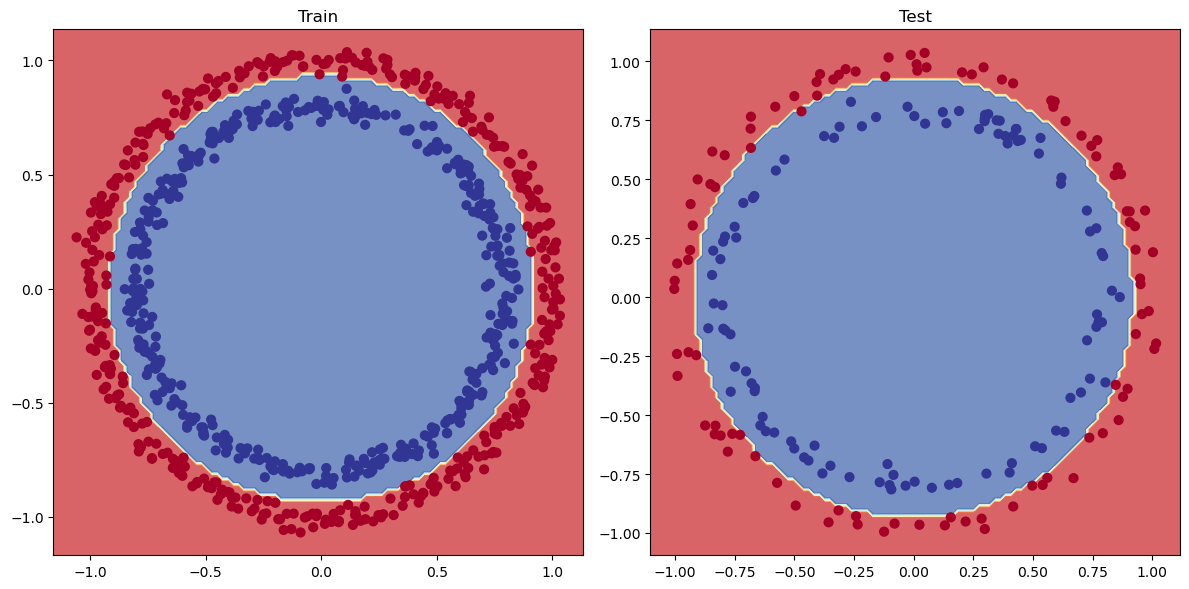

In [37]:
# Plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(my_model, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(my_model, X_test, y_test)
plt.tight_layout()
plt.show()

### 5.1 Preparing data to see if our model can fit a straight line
One way to troubleshoot to a larger problem is to test out a smaller problem.

(Already done with ReLU, but will proceed with the course)

In [38]:
# Create some data (same as notebook 01)
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create data
X_regression = torch.arange(start, end, step).unsqueeze(1).to(device)
y_regression = weight * X_regression + bias

print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [39]:
# Create train and test split
X_train_regression, X_test_regression, y_train_regression, y_test_regression = train_test_split(X_regression, y_regression, test_size=0.2, random_state=42)

# Check the lengths of each
list(map(len, [X_train_regression, X_test_regression, y_train_regression, y_test_regression]))

[80, 20, 80, 20]

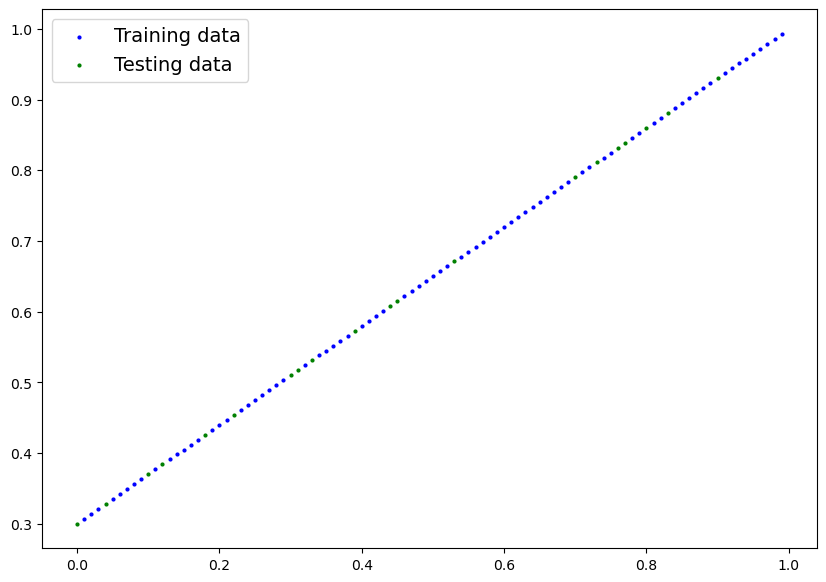

In [40]:
plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression)

### Adjusting `model_1` to fit a straight line

In [41]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10) # extra layer
        self.layer_3 = nn.Linear(in_features=10, out_features=1)

    def forward(self, x): # note: always make sure forward is spelt correctly!
        # Creating a model like this is the same as below, though below
        # generally benefits from speedups where possible.
        # z = self.layer_1(x)
        # z = self.layer_2(z)
        # z = self.layer_3(z)
        # return z
        return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [42]:
# Same architecture as model_1 (but using nn.Sequential())
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [43]:
# Loss and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model_2.parameters(),
                            lr=0.01)

In [44]:
from sklearn.metrics import r2_score
# Train the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 10_000

# Put the data on the target device
X_train_regression, X_test_regression, y_train_regression, y_test_regression = tuple(map(lambda x: x.to(device), [X_train_regression, X_test_regression, y_train_regression, y_test_regression]))
for epoch in range(epochs):
    model_2.train()
    y_pred = model_2(X_train_regression)
    loss = loss_fn(y_pred, y_train_regression)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model_2.eval()
    with torch.inference_mode():
        test_pred = model_2(X_test_regression)
        loss = loss_fn(test_pred, y_test_regression)
        r2 = r2_score(y_test_regression.cpu(), test_pred.cpu())
        if (epoch % 500) == 0:
            print(f"Epoch: {epoch}, Loss: {loss.item()}, R²: {r2:.4f}")

Epoch: 0, Loss: 0.5718773603439331, R²: -7.9518
Epoch: 500, Loss: 0.021482640877366066, R²: 0.9854
Epoch: 1000, Loss: 0.01917411759495735, R²: 0.9883
Epoch: 1500, Loss: 0.01885124482214451, R²: 0.9890
Epoch: 2000, Loss: 0.017601758241653442, R²: 0.9904
Epoch: 2500, Loss: 0.015474027022719383, R²: 0.9924
Epoch: 3000, Loss: 0.014361928217113018, R²: 0.9934
Epoch: 3500, Loss: 0.014092097990214825, R²: 0.9937
Epoch: 4000, Loss: 0.014374000951647758, R²: 0.9938
Epoch: 4500, Loss: 0.011795911006629467, R²: 0.9954
Epoch: 5000, Loss: 0.012208511121571064, R²: 0.9953
Epoch: 5500, Loss: 0.011505509726703167, R²: 0.9957
Epoch: 6000, Loss: 0.01075719017535448, R²: 0.9962
Epoch: 6500, Loss: 0.011195896193385124, R²: 0.9961
Epoch: 7000, Loss: 0.010079285129904747, R²: 0.9967
Epoch: 7500, Loss: 0.009735229425132275, R²: 0.9969
Epoch: 8000, Loss: 0.009294502437114716, R²: 0.9971
Epoch: 8500, Loss: 0.00985332764685154, R²: 0.9970
Epoch: 9000, Loss: 0.01006933581084013, R²: 0.9970
Epoch: 9500, Loss: 0.0

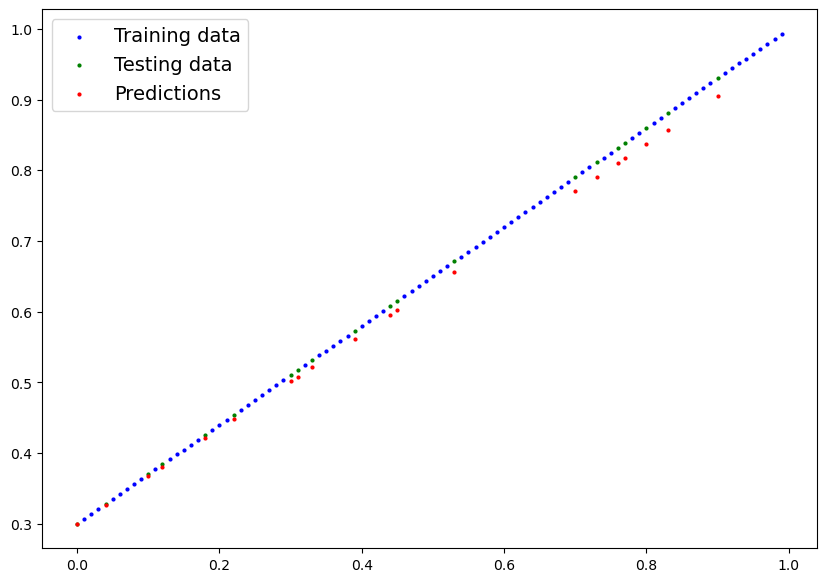

In [45]:
# Turn on evaluation mode
model_2.eval()

# Mke predictions (inference)
with torch.inference_mode():
    y_preds = model_2(X_test_regression)

# Plot data and predictions
plot_predictions(*map(lambda l: l.cpu(), (X_train_regression, y_train_regression, X_test_regression, y_test_regression)), predictions=y_preds)

## 6. The missing piece: non-linearity

"That pattern could you draw if you were given an infinite amount of a straight line and non-straight lines?"

Or in machine learning terms, an infinite (but really it is finite) of linear and non-linear functions?

### 6.1 Recreating non-linear data (red and blue circles)

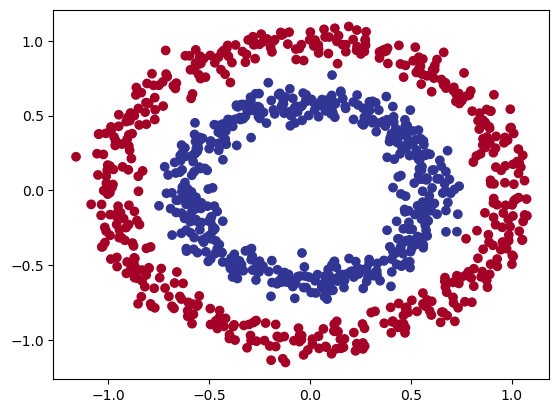

In [114]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples=n_samples,factor=0.6, noise=0.065, random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [115]:
# Convert data to tensors and then to train and test splits
import torch
from sklearn.model_selection import train_test_split

# Turn data into tensors
X = torch.Tensor(X)
y = torch.Tensor(y)

# Split into train test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train[:5], y_train[:5]

(tensor([[ 0.5344, -0.3074],
         [ 0.5813, -0.7313],
         [-1.0319, -0.0935],
         [-0.9573, -0.2272],
         [-0.1207,  0.6246]]),
 tensor([1., 0., 0., 0., 1.]))

### 6.2 Building a model with non-linearity

* Linear = straight lines
* Non-liner = non-straight lines

In [201]:
# Build a model with non-linear functions
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=4, out_features=8, bias=True)
        self.layer_2 = nn.Linear(in_features=8, out_features=4, bias=True)
        self.layer_3 = nn.Linear(in_features=4, out_features=1, bias=True)
        self.activation = nn.ReLU()

    def forward(self, x):
        x_sq = x ** 2 # Element-wise square
        x_aug = torch.cat((x, x_sq), dim=1) # Interesting experimentation with circle formulas, it worked well :)
        x_aug = self.activation(self.layer_1(x_aug))
        x_aug = self.activation(self.layer_2(x_aug))
        return self.layer_3(x_aug)

model_3 = CircleModelV2().to(device)
model_3.to(device)

CircleModelV2(
  (layer_1): Linear(in_features=4, out_features=8, bias=True)
  (layer_2): Linear(in_features=8, out_features=4, bias=True)
  (layer_3): Linear(in_features=4, out_features=1, bias=True)
  (activation): ReLU()
)

In [202]:
# Create a loss function
loss_fn = nn.BCEWithLogitsLoss()

# Create an optimizer
optimizer = torch.optim.Adam(model_3.parameters(), lr=0.001)

In [203]:
# Write a training and evaluation loop for my_model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
EPOCHS = 1_500

# Put the data to a target device
X_train, X_test, y_train, y_test = map(lambda l:l.to(device), (X_train, X_test, y_train, y_test))

# Build training and evaluation loop
for epoch in range(EPOCHS):
    ### Training
    model_3.train()

    # 1. Forward pass
    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    # 2. Calculate the loss/accuracy
    loss = loss_fn(y_logits,
                   y_train)
    acc = accuracy_fn(y_train, y_pred)


    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward (backpropagation)
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    if epoch % 50 == 0:
        my_model.eval()
        with torch.inference_mode():
            # 1. Forward pass
            test_logits = model_3(X_test).squeeze()
            test_pred = torch.round(torch.sigmoid(test_logits))

            # 2. Test loss/acc
            loss = loss_fn(test_logits, y_test)
            acc = accuracy_fn(y_test, test_pred)

            print(f"Epoch: {epoch}, Loss: {loss}, Accuracy: {acc}")

Epoch: 0, Loss: 0.7108706831932068, Accuracy: 50.0
Epoch: 50, Loss: 0.7002189755439758, Accuracy: 50.0
Epoch: 100, Loss: 0.692047119140625, Accuracy: 50.0
Epoch: 150, Loss: 0.6794945001602173, Accuracy: 50.0
Epoch: 200, Loss: 0.6548387408256531, Accuracy: 50.0
Epoch: 250, Loss: 0.6169691681861877, Accuracy: 50.0
Epoch: 300, Loss: 0.5674306750297546, Accuracy: 66.5
Epoch: 350, Loss: 0.5130760073661804, Accuracy: 78.5
Epoch: 400, Loss: 0.46108952164649963, Accuracy: 89.5
Epoch: 450, Loss: 0.41348060965538025, Accuracy: 90.5
Epoch: 500, Loss: 0.37531983852386475, Accuracy: 95.0
Epoch: 550, Loss: 0.344918817281723, Accuracy: 95.5
Epoch: 600, Loss: 0.3196699023246765, Accuracy: 96.5
Epoch: 650, Loss: 0.2980848550796509, Accuracy: 96.5
Epoch: 700, Loss: 0.27988341450691223, Accuracy: 96.5
Epoch: 750, Loss: 0.2640007436275482, Accuracy: 97.0
Epoch: 800, Loss: 0.24965612590312958, Accuracy: 97.5
Epoch: 850, Loss: 0.2369110882282257, Accuracy: 98.0
Epoch: 900, Loss: 0.22527404129505157, Accurac

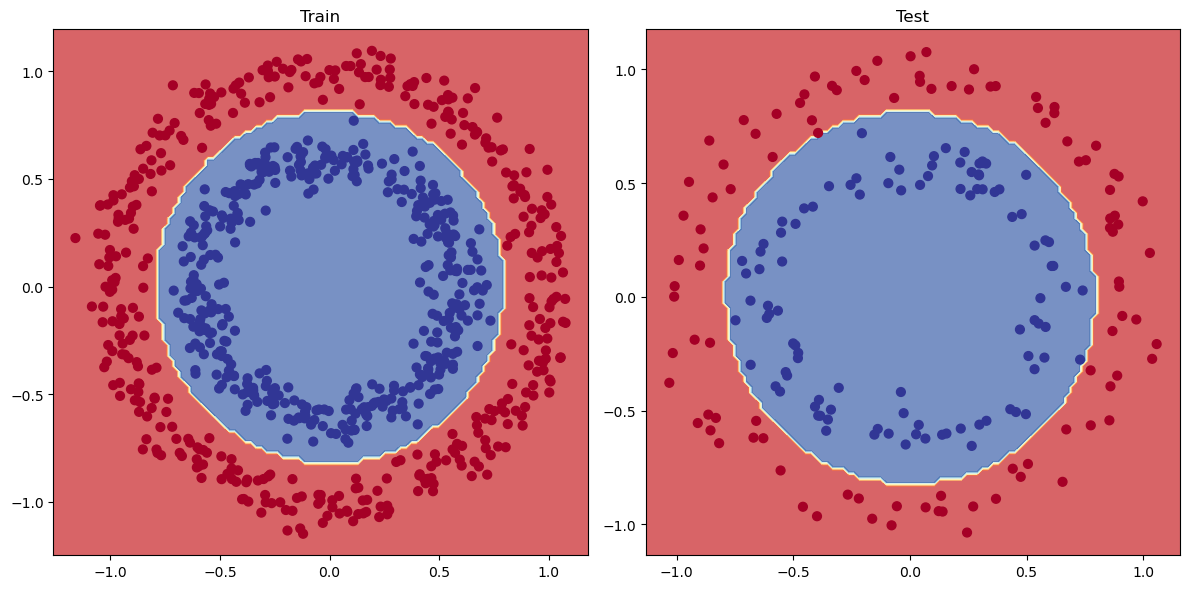

In [204]:
# Plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)
plt.tight_layout()
plt.show()

### 6.4 Evaluating a model trained with non-linear activation functions

In [205]:
# (already done)
model_3.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()

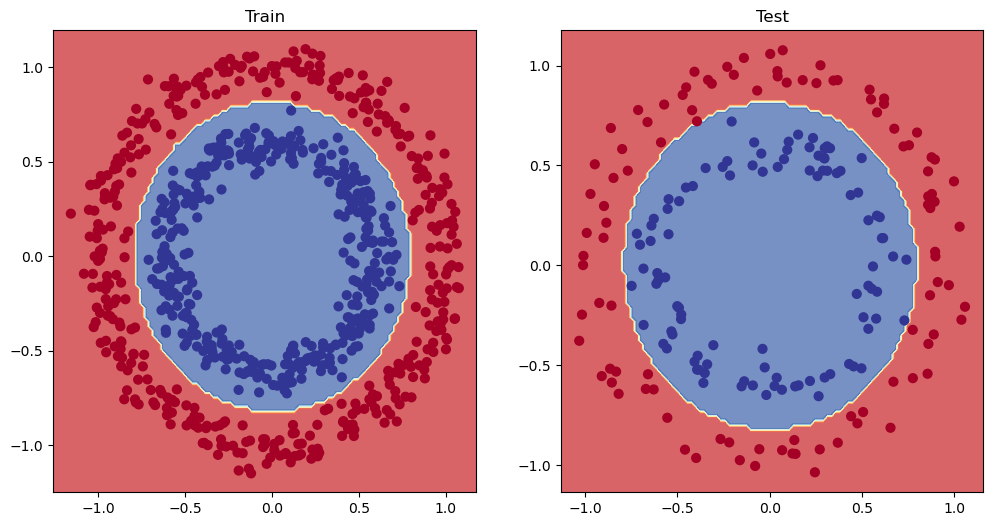

In [208]:
# Plot decision boundaries
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

**Challenge:** Can you improve model_3 to do better than 80% accuracy on the test data?

Done :DD

## 7. Replicating non-linear activation functions
Neural networks, rather than us telling the model what to learn, we give it the tools to discover patterns in data and it tries to figure out the patterns on its own.

And these tools are linear & non-linear functions.

In [214]:
# Create a tensor
A = torch.arange(-10, 10, 1, dtype=torch.float)
A.dtype

torch.float32

In [215]:
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

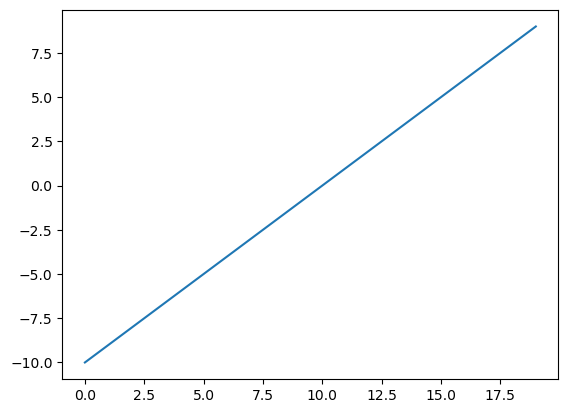

In [216]:
# Visualize the tensor
plt.plot(A)

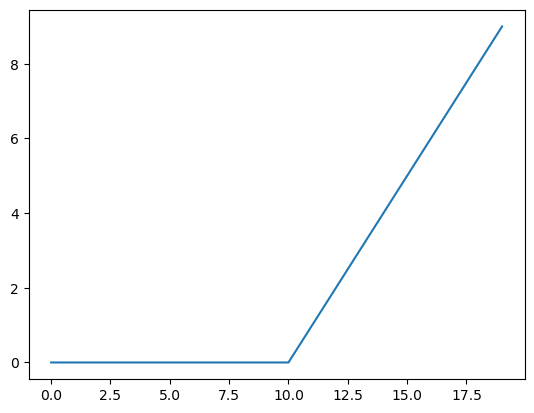

In [217]:
plt.plot(torch.relu(A));

In [218]:
def relu(x):
    return torch.max(torch.tensor(0, device=x.device), x)

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

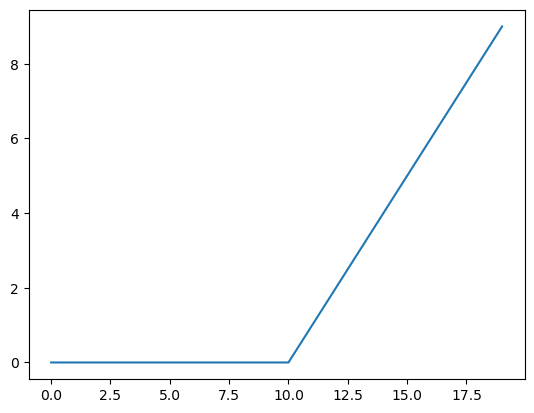

In [220]:
plt.plot(relu(A));

In [221]:
def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

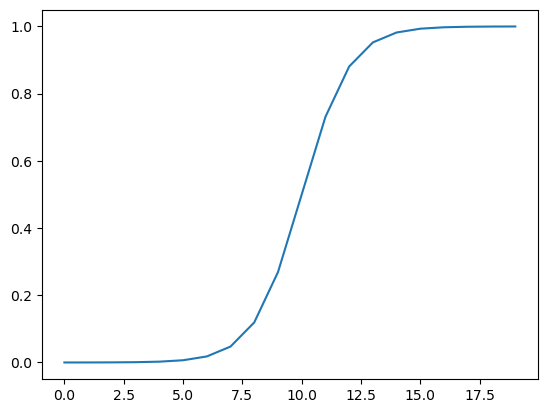

In [223]:
plt.plot(torch.sigmoid(A));

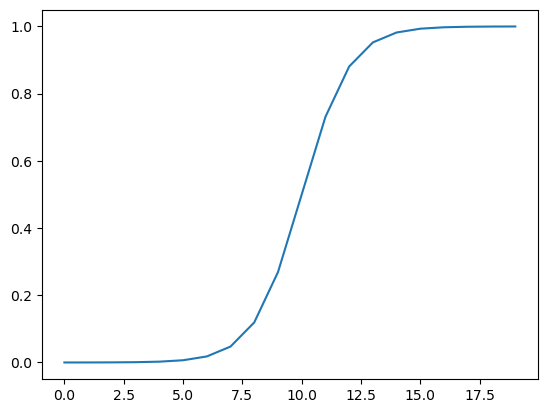

In [225]:
plt.plot(sigmoid(A));

## 8. Putting it all together with a multi-class classification problem
* Binary classification = one thing or another (cat vs. dog, spam
vs. not spam, fraud or not fraud)
* Multi-class classification = more than one thing or another
(cat vs. dog vs. chicken)

### 8.1 Creating a toy multi-class datset

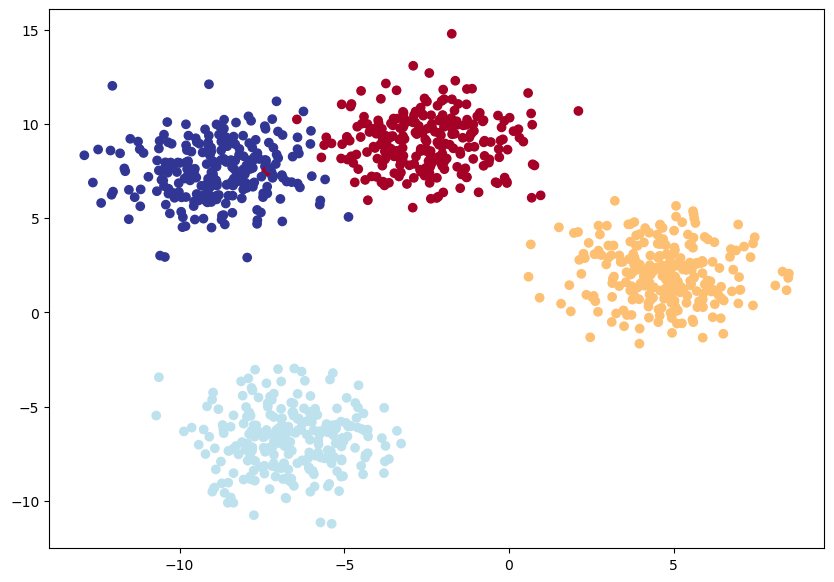

In [270]:
# Import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1_000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5,
                            random_state=RANDOM_SEED)

# 2. Turn data into tensors
X_blob = torch.Tensor(X_blob).type(torch.float)
y_blob = torch.Tensor(y_blob).type(torch.float)

# 3. Split into train and test
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob, y_blob, test_size=0.2, random_state=RANDOM_SEED)

# 4. Plot data (visualize)
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);

### 8.2 Building a multi-class model in PyTorch

In [271]:
# Create device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [272]:
# Build a multi-class classification model
class BlobModel(nn.Module):
    def __init__(self, in_features: int, out_features:  int, hidden_units=8):
        """
        Initialize multi-class classification model

        Args:
            in_features: number of input features
            out_features: number of output features
            hidden_units: number of hidden units
        """
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features, hidden_units),
            nn.ReLU(),
            nn.Linear(hidden_units, hidden_units),
            nn.ReLU(),
            nn.Linear(hidden_units, out_features)
        )

    def forward(self, x):
        self.linear_layer_stack(x)
        return self.linear_layer_stack(x)

# Create an instance of BlobModel and send it to target device
model_4 = BlobModel(in_features=NUM_FEATURES, out_features=NUM_CLASSES, hidden_units=8).to(device)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [277]:
X_blob_train.shape, y_blob_train[:5]

(torch.Size([800, 2]), tensor([1., 0., 2., 2., 0.]))

In [278]:
torch.unique(y_blob)

tensor([0., 1., 2., 3.])

### 8.3 Creating a loss function and an optimizer for a multi-class classification model

In [279]:
# Create a loss function for multi-class classification - loss functions measure how wrong our model's predictions are
loss_fn = nn.CrossEntropyLoss()

# Create an optimizer for multi-class classification - optimizer updates our model parameters to try and reduce the loss
optimizer = torch.optim.SGD(params=model_4.parameters(),
                            lr=0.001) # learning rate is a hyperparameter you can change

### 8.4 Getting prediction probabilities for a multi class PyTorch model

In order to evaluate, train, and test our model, we need to convert our model's outputs (logtis) to prediction probabilities and then to prediction labels.

Logtis -> Pred probs -> Pred labels

In [286]:
# Let's get some raw outputs of our model
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test)

y_logits[:10]

tensor([[ 4.1542e-01,  3.9398e-01,  2.6789e-02,  2.6462e-02],
        [-1.3025e+00,  1.0642e+00,  1.4936e+00,  5.7428e-01],
        [-6.8335e-01,  1.4790e+00,  5.1940e-01, -5.6530e-03],
        [ 3.4926e-01,  3.8598e-01,  6.5311e-02,  7.9170e-02],
        [ 3.1676e-01,  3.6316e-01,  8.6246e-02,  7.5117e-02],
        [-1.6411e+00,  1.2017e+00,  1.7577e+00,  6.4077e-01],
        [-4.6675e-01,  1.2769e+00,  3.4761e-01, -1.5087e-03],
        [-1.2123e-01,  5.1126e-01,  4.9792e-01,  2.3469e-01],
        [-1.1826e+00,  1.6903e+00,  8.9079e-01,  1.1173e-02],
        [ 4.9561e-02,  4.5347e-01,  3.2572e-01,  1.6999e-01]])

In [287]:
y_blob_test[:10]

tensor([1., 3., 2., 1., 0., 3., 2., 0., 2., 0.])

In [290]:
# Convert our model's logit outputs to prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[ 0.4154,  0.3940,  0.0268,  0.0265],
        [-1.3025,  1.0642,  1.4936,  0.5743],
        [-0.6833,  1.4790,  0.5194, -0.0057],
        [ 0.3493,  0.3860,  0.0653,  0.0792],
        [ 0.3168,  0.3632,  0.0862,  0.0751]])
tensor([[0.2999, 0.2935, 0.2033, 0.2033],
        [0.0289, 0.3084, 0.4738, 0.1889],
        [0.0667, 0.5798, 0.2221, 0.1314],
        [0.2814, 0.2919, 0.2118, 0.2148],
        [0.2757, 0.2888, 0.2190, 0.2165]])


In [293]:
# Convert our model's logit outputs to prediction labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds

tensor([0, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 0, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1,
        1, 1, 2, 1, 0, 2, 2, 0, 1, 2, 0, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1,
        2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2,
        2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 0, 2, 2, 2,
        1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1,
        1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 0, 1, 0, 2, 1, 1,
        1, 1, 2, 2, 2, 1, 1, 0, 2, 1, 2, 1, 2, 2, 1, 0, 1, 1, 2, 1, 2, 2, 1, 2,
        1, 1, 1, 2, 2, 0, 0, 0, 0, 1, 2, 0, 2, 1, 1, 0, 1, 1, 2, 0, 1, 1, 2, 2,
        1, 2, 1, 1, 2, 0, 1, 0])

In [294]:
y_blob_test

tensor([1., 3., 2., 1., 0., 3., 2., 0., 2., 0., 0., 1., 0., 0., 0., 3., 3., 2.,
        3., 3., 3., 0., 1., 2., 2., 2., 3., 0., 1., 0., 3., 1., 1., 3., 1., 2.,
        1., 3., 0., 2., 0., 3., 3., 2., 0., 3., 1., 1., 0., 3., 1., 0., 1., 1.,
        3., 2., 1., 1., 3., 2., 2., 0., 3., 2., 2., 0., 0., 3., 3., 0., 0., 3.,
        3., 3., 2., 3., 3., 3., 3., 1., 0., 2., 3., 2., 3., 3., 2., 3., 3., 2.,
        3., 3., 1., 3., 3., 3., 1., 0., 3., 2., 0., 0., 3., 0., 2., 3., 1., 0.,
        3., 2., 1., 1., 0., 2., 2., 3., 0., 0., 1., 2., 2., 3., 0., 1., 2., 0.,
        0., 0., 2., 3., 1., 2., 3., 2., 0., 3., 0., 0., 1., 1., 1., 0., 2., 2.,
        2., 2., 0., 3., 3., 2., 2., 1., 3., 2., 0., 0., 3., 3., 2., 1., 2., 0.,
        3., 2., 0., 3., 2., 0., 2., 2., 2., 0., 3., 1., 1., 1., 1., 1., 3., 1.,
        0., 2., 2., 1., 2., 2., 0., 1., 2., 2., 0., 0., 1., 3., 2., 0., 3., 1.,
        2., 1.])